## Assignment 1A: Anscombe's quartet


Start by downloading these four datasets: [Data 1](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv), [Data 2](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv), [Data 3](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv), and [Data 4](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

In [1]:
import tempfile
import os.path
import urllib
import csv
import numpy as np
import dateutil.parser

def download_file(url, file_name) :
    #search for the file in the temp dir
    tmp_dir = tempfile.gettempdir()
    file_path = tmp_dir+"/"+file_name
    #If the file is not found, download it
    if not os.path.isfile(file_path) :
        urllib.urlretrieve(url, file_path)
        print file_name+" downloaded"
    print "File "+file_name+" is ready"
    return file_path

def read_data_file(file_path):
    infile = open(file_path, 'r')    # open the file for reading
    reader = csv.reader(infile, delimiter='\t')
    data_csv = []
    # read through the CSV one line at a time
    for i,line in enumerate(reader):
        # assign the various fields in the line to variables
        record = {}
        record["x"] = int(line[0])
        record["y"] = float(line[1])
        data_csv.append(record)
    print "loaded: "+(file_path.split("/")[-1])
    return data_csv

data = []
for i in range(1,5):
    data_file = download_file("https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data%d.tsv"%i,
                              "data%d.tsv"%i)
    data.append(read_data_file(data_file))
    print ""

File data1.tsv is ready
loaded: data1.tsv

File data2.tsv is ready
loaded: data2.tsv

File data3.tsv is ready
loaded: data3.tsv

File data4.tsv is ready
loaded: data4.tsv



* Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
* Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 

In [2]:
for i,data_table in enumerate(data):
    print "data%d x mean: % 6.2f"%(i,np.mean([row["x"] for row in data_table]))
    print "data%d y mean: % 6.2f"%(i,np.mean([row["y"] for row in data_table]))
    print ""

data0 x mean:   9.00
data0 y mean:   7.50

data1 x mean:   9.00
data1 y mean:   7.50

data2 x mean:   9.00
data2 y mean:   7.50

data3 x mean:   9.00
data3 y mean:   7.50



* Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).

In [3]:
for i,data_table in enumerate(data):
    print "data%d x variance: % 6.3f"%(i,np.var([row["x"] for row in data_table]))
    print "data%d y variance: % 6.3f"%(i,np.var([row["y"] for row in data_table]))
    print ""

data0 x variance:  10.000
data0 y variance:  3.752

data1 x variance:  10.000
data1 y variance:  3.752

data2 x variance:  10.000
data2 y variance:  3.748

data3 x variance:  10.000
data3 y variance:  3.748



* Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).

In [4]:
for i,data_table in enumerate(data):
    x = [row["x"] for row in data_table]
    y = [row["y"] for row in data_table]
    
    coef = np.corrcoef(x,y)
    print "data%d Pearson correlation: % 6.3f"%(i,coef[0][1])

data0 Pearson correlation:  0.816
data1 Pearson correlation:  0.816
data2 Pearson correlation:  0.816
data3 Pearson correlation:  0.817


* The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
```
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
```

In [5]:
from scipy import stats
slope_regress = []
for i,data_table in enumerate(data):
    x = [row["x"] for row in data_table]
    y = [row["y"] for row in data_table]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slope_regress.append([slope,intercept])
    print "data%d slope: % 6.2f, intercept: % 6.2f"%(i, slope, intercept)


data0 slope:   0.50, intercept:   3.00
data1 slope:   0.50, intercept:   3.00
data2 slope:   0.50, intercept:   3.00
data3 slope:   0.50, intercept:   3.00


* Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)

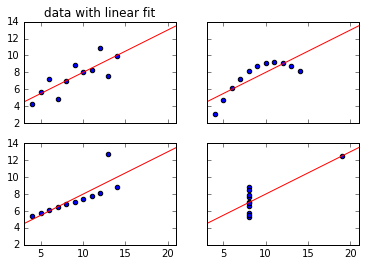

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.close('all')
#setting up the subplots layout 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax = []
ax.append(ax1)
ax.append(ax2)
ax.append(ax3)
ax.append(ax4)
ax1.set_title('data with linear fit')
#plot an scatter plot in each subplot
for i,data_table in enumerate(data):
    x = [row["x"] for row in data_table]
    y = [row["y"] for row in data_table]
    #plotting the scatter plot for the raw data in each dataset
    ax[i].scatter(x, y)
    X_plot = np.linspace(0,25,20)
    m=slope_regress[i][0]
    b=slope_regress[i][1]
    #ploting the linear regression with the previously calculated values
    ax[i].plot(X_plot, m*X_plot + b, color='r')
    ax[i].set_xlim([3, 21])
    ax[i].set_ylim([2, 14])
plt.show()

* Explain - in your own words - what you think my point with this exercise is.
  * In this exercise we made an exploratory analysis of 4 datasets that are not so similar in their x vs. y Relation, nonetheless the measurements taken over this data gave almost the same results.
  * If we look only at the measurements (mean, variance, Pearson correlation, linear regression, we could mistakenly conclude that this datasets behave the same, but when looking at the plotted data we realize that they are very different and it’s just because some special features of the datasets that they seem to behave as this measurements indicate.

  * For example in the datasets 3 and 4 its just 1 point what makes the linear regression behave the same that in the rest of the datasets, and in the file 2 we can see (judging from the shape) that a line would probably not be the best way to approximate this values.

## Assignment 1B: Slicing data

We investigate the types of crime and how they take place across San Francisco's police districts.



In [7]:
import tempfile
import os.path
import urllib
import csv
import numpy
import dateutil.parser
#search for the file in the temp dir
file_path = download_file('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD',
                          "SFPD_Incidents_-_from_1_January_2003.csv")

data = []
# read through the CSV one line at a time
with open(file_path, 'r') as infile:
    reader = csv.DictReader(infile, delimiter=',')
    for line in reader:
        # assign the various fields in the line to variables
        crime = {}
        crime["category"] = line["Category"]
        crime["neighborhood"] = line["PdDistrict"]
        #evaluate the string expression of Location into a tuple of floats
        crime["latitude"], crime["longitude"] = eval(line["Location"])
        if crime["neighborhood"] is not '':
            data.append(crime)
        else:
            print "crime with missing district: "
            print crime
print "File loaded"

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE',
                  'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC',
                  'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
                  'DISORDERLY CONDUCT'])

#filter the crimes according to their category
data_focuscrimes = filter(lambda a: a['category'] in focuscrimes, data)


File SFPD_Incidents_-_from_1_January_2003.csv is ready
crime with missing district: 
{'category': 'LARCENY/THEFT', 'latitude': 37.7082024584902, 'neighborhood': '', 'longitude': -122.413351985284}
File loaded



* We'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.

In [8]:
districts = set(map(lambda a: a['neighborhood'], data))

* Which has the most crimes? Which has the most focus crimes?

In [9]:
crimes_per_distrcit = {}
No_crimes_per_distrcit = {}
No_focuscrimes_per_distrcit = {}
for district in districts:
    #Get the crimes of the current district
    crimes_per_distrcit[district] = filter(lambda a: a['neighborhood'] == district, data)
    No_crimes_per_distrcit[district] = len(crimes_per_distrcit[district])
    #Get the focus crimes of the current district 
    No_focuscrimes_per_distrcit[district] = len(filter(lambda a: a['category'] in focuscrimes,
                                             crimes_per_distrcit[district]))
    
print "District with most crimes: " + sorted(
    No_crimes_per_distrcit, key=No_crimes_per_distrcit.get, reverse=True)[0]
print "District with most focus crimes: " + sorted(
    No_focuscrimes_per_distrcit, key=No_focuscrimes_per_distrcit.get, reverse=True)[0]

District with most crimes: SOUTHERN
District with most focus crimes: SOUTHERN


* Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
- First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/categoryhist.png). Let's call it `P(crime)`.

In [10]:
#import python's 3 division (python 2 only has integer division)
from __future__ import division 
from collections import Counter
categories = [item['category'] for item in data_focuscrimes]

c_cat = Counter(categories)
p_crimes = {}
#Calculate the propability of each crime
for category, times in c_cat.items():
    p_crimes[category] = times / len(data)


- Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.

In [11]:
p_crime_district = {}
for district, crimes in crimes_per_distrcit.items():
    #Get the focus crimes
    fcrimes = filter(lambda a: a['category'] in focuscrimes, crimes)
    #Get only the category of the crimes
    district_categories = [item['category'] for item in fcrimes]
    c_dis_cat = Counter(district_categories)
    p_district_crimes = {}
    
    #Calculate the propability of the crimes given the district
    for category, times in c_dis_cat.items():
        p_district_crimes[category] = times / len(crimes)

    p_crime_district[district] = p_district_crimes


- Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.

In [12]:
p_ratio = {}

#Calculate the ration for every district and every category
for district, cat_probs in p_crime_district.items():
    ratio_cat_probs = {}
    for cat, prob in cat_probs.items():
        ratio = prob / p_crimes[cat]
        ratio_cat_probs[cat] = ratio
    p_ratio[district] = ratio_cat_probs
    

- For each district plot these ratios for the 14 focus crimes.

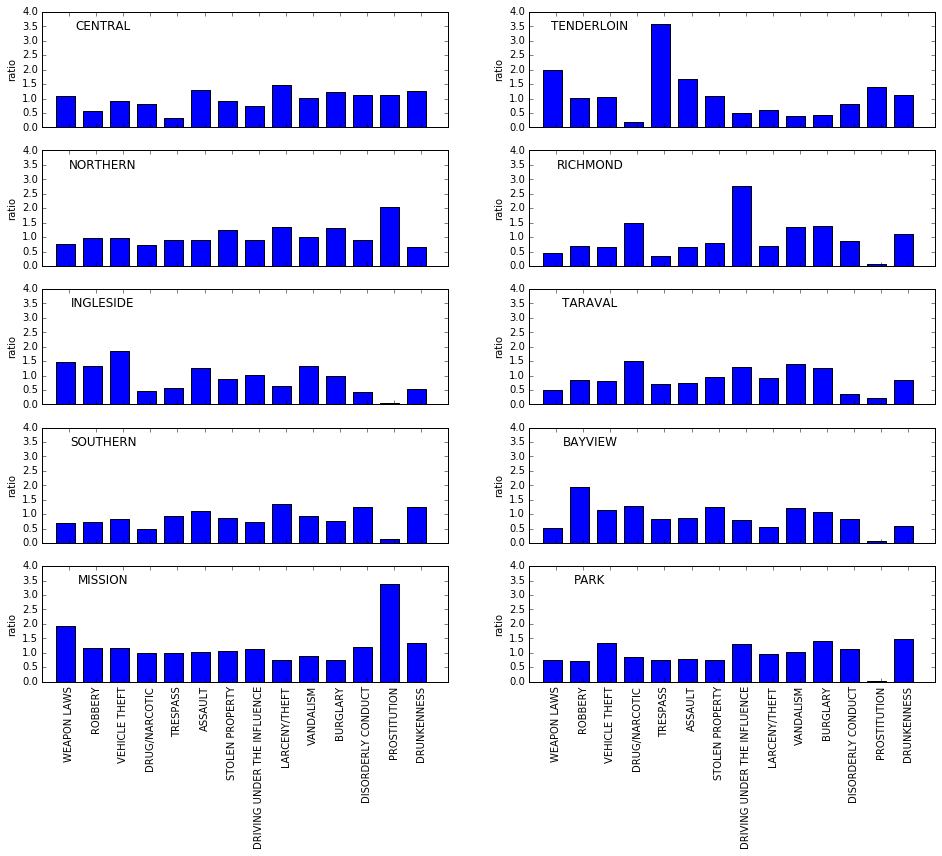

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

width = .7

fig, ax = plt.subplots(5, 2, sharex=True, figsize=(16,12))
indx = 0
indy = 0
for district, cat_probs in p_ratio.items():
    #put the bars at locations [0.5, 1.5, 2.5 ....]
    ax[indx][indy].bar([i + 0.5 for i in range(len(cat_probs.values()))],
                       cat_probs.values(), width)
    ax[indx][indy].set_xlim([0,15])
    ax[indx][indy].set_ylabel('ratio')
    ax[indx][indy].set_title(district, y=0.8, x=0.15)
    ax[indx][indy].set_xticks([])
    #set y ticks at location [0, 0.5, 1 ...]
    ax[indx][indy].set_yticks([i / 2 for i in range(9)])
    ax[indx][indy].set_yticklabels([i / 2 for i in range(9)])
    indx += 1
    if indx == 5:
        #For the two bottom plots add x ticks and labels
        ax[indx-1][indy].set_xticks(range(1, len(cat_probs.keys()) + 1))
        ax[indx-1][indy].set_xticklabels(cat_probs.keys(), rotation=90)
        indx = 0
        indy += 1
        
    
plt.show()


   - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?
   
The top crimes in _Tenderloin_ are Trespass, Weapons laws and Assault. The wikipedia page for _Tenderloin_ states pretty much the same information, it is an area of high crime activity  particularly violent street crime such as robbery and aggravated assault. The top crimes for _Mission_ are Prostitution and Weapons law. _Mission_ is mainly inhabeted by imigrants and refuges from Latin America, which it could possible explain the prostitution and weapon laws crimes. Finally for _Richmond_ the top crimes are Driving under influence and Drugs/narcotics. _Richmond_ on the other half is a rich district with big mansions, so one would except these kind of crimes to be more frequent in a neighborhood like that.

- Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?

This way the propabilities we calculate take into account the overal crime activity in the district. If a crime not in focuscrimes is very frequent in the district the propabilities of focuscrimes would have been way smaller. If we did not do that we could have produced missleading conclusions. For example if kidnapping is the most frequent crime in a district with a frequency lets say of 10 followed by prostitution with a frequency of 3 and assault with frequency of 1, it would have been a mistake to consider the propabilities of prostitution 75% and of assault 25%.

## Assignment 1C: KNN


The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from last week's exercises that the focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE` tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map. 

* Begin by using `geoplotlib` to plot all incidents of the three crime types on their own map using [`geoplotlib.kde()`](https://github.com/andrea-cuttone/geoplotlib/blob/master/examples/kde.py). This will give you an idea of how the varioius crimes are distributed across the city.

In [14]:
#Get an array with only the lattitudes and longitudes
#geoplotlib requires the geo data in this format: 
lat = [item["latitude"] for item in data]
lon = [item["longitude"] for item in data]
geo_data_for_plotting = {"lat": lat,
                         "lon": lon}

In [15]:
import geoplotlib
from geoplotlib.utils import BoundingBox
#Ploting the graph for density of the crimes in the city 
geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-4, alpha=150)
geoplotlib.set_bbox(BoundingBox(north=37.8, west=-122.5, south=37.7, east=-122.3))
geoplotlib.inline()

('smallest non-zero count', 3.5823932721920228e-09)
('max count:', 360.96682849335326)


* Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out `scikit-learn`'s [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). If you end up using the latter (recommended), you may want to check out [this example](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html) to get a sense of the usage.
  - You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. **But** do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset).

Preparing the data for the focus crimes `PROSTITUTION`, `DRUG/NARCOTIC` and `DRIVING UNDER THE INFLUENCE`:

In [16]:
focus_categories = ['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']
#Get only the crimes with the focus category 
focus_crimes = filter(lambda a: a['category'] in focus_categories, data)

  - Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?
    - As we can see below, there are much more drug related crimes in our dataset, this could make the prediction model biased towards predicting drug related crimes in most of the places instead of finding a the correlation between the coordinates and the category

In [17]:
import matplotlib.cm as cm
from collections import Counter
data_cat = [item["category"] for item in focus_crimes]
#counts the occurrences of each category
categories_count = Counter(data_cat)
print "DRUG/NARCOTIC count: %d"%categories_count.get('DRUG/NARCOTIC')
print "PROSTITUTION count: %d"%categories_count.get('PROSTITUTION')
print "DRIVING UNDER THE INFLUENCE count: %d"%categories_count.get('DRIVING UNDER THE INFLUENCE')

DRUG/NARCOTIC count: 111087
PROSTITUTION count: 15603
DRIVING UNDER THE INFLUENCE count: 4926


  - You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following. 
  
    - Balancing the data for each category would find where is most likely for each crime to occur instead of just finding the most probable crime in general (which is in this case DRUG/NARCOTIC, so the sampled data is more useful to find this correlation between place and category.
    - Taking into account all the occurrences of the 3 categories instead of balancing them could be useful for visualizing the rate between this 3 crimes.

* Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. 
* Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, `K`.  

**NOTE**: To get a map only of SF, you need to create your own * BoundingBox * which can be done in the following way:
```
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)
```

In [18]:
from collections import Counter
from sklearn import neighbors
import random
import geoplotlib
from geoplotlib.utils import BoundingBox
data_cat = [item["category"] for item in focus_crimes]
categories_count = Counter(data_cat)
#we obtain the minimum number of crimes we can get from all the categories at the same time 
min_cat_count = min(categories_count.get('DRUG/NARCOTIC'),
                    categories_count.get('PROSTITUTION'),
                    categories_count.get('DRIVING UNDER THE INFLUENCE'))

sampled_crimes = []
#and then we randomly select that amount of crimes for each category
for category in focus_categories:
    #Get only the crimes with the specific category 
    cat_crimes = filter(lambda a: a['category'] == category, focus_crimes)
    sampled_crimes.extend(random.sample(cat_crimes, min_cat_count))

lat = [item["latitude"] for item in sampled_crimes]
lon = [item["longitude"] for item in sampled_crimes]

#Join the array lat and lon into a matrix
gps_cords = zip(lat,lon)
categories = [item["category"] for item in sampled_crimes]

#setting up of equally spaced 100 points in the boundaries of SF
longs = np.linspace(-122.37, -122.52, num=100)
lats = np.linspace(37.7, 37.81, num=100)

locations = []

#Create a point combining every lat with every lon
for lat in lats:
    for lon in longs:
        locations.append((lat, lon))

locations = np.array(locations)

## K = 5
For 5 neightbors we find not so clearly defined clusters of crimes and some big clusters probably defined by a small number of crimes (specially in the noth west corner of the grid

In [19]:
#training for the default of K=5
knn=neighbors.KNeighborsClassifier()
knn.fit(gps_cords, categories)
predictions = knn.predict(locations)

#selecting the predicted crimes for each category
drugs = np.where(predictions=='DRUG/NARCOTIC')
prostitutions = np.where(predictions=='PROSTITUTION')
driving = np.where(predictions=='DRIVING UNDER THE INFLUENCE')

#they get colored diferently for each crime
geo_data = {'lat': locations[:,0][drugs], 'lon': locations[:,1][drugs]}
geoplotlib.dot(geo_data, color='red')
geo_data = {'lat': locations[:,0][prostitutions], 'lon': locations[:,1][prostitutions]}
geoplotlib.dot(geo_data, color='blue')
geo_data = {'lat': locations[:,0][driving], 'lon': locations[:,1][driving]}
geoplotlib.dot(geo_data, color='green')
geoplotlib.set_bbox(BoundingBox(north=37.8, west=-122.5, south=37.7, east=-122.3))

geoplotlib.inline()

## K = 10
For 10 neighbours we can see more clearly defined clusters and we find less small groups of neighbouring predictions

In [20]:
knn=neighbors.KNeighborsClassifier(10)
knn.fit(gps_cords, categories)
predictions = knn.predict(locations)

drugs = np.where(predictions=='DRUG/NARCOTIC')
prostitutions = np.where(predictions=='PROSTITUTION')
driving = np.where(predictions=='DRIVING UNDER THE INFLUENCE')

geo_data = {'lat': locations[:,0][drugs], 'lon': locations[:,1][drugs]}
geoplotlib.dot(geo_data, color='red')
geo_data = {'lat': locations[:,0][prostitutions], 'lon': locations[:,1][prostitutions]}
geoplotlib.dot(geo_data, color='blue')
geo_data = {'lat': locations[:,0][driving], 'lon': locations[:,1][driving]}
geoplotlib.dot(geo_data, color='green')
geoplotlib.set_bbox(BoundingBox(north=37.8, west=-122.5, south=37.7, east=-122.3))

geoplotlib.inline()

## K = 30
For 30 neighbours the number of small clusters have gone down greatly, and they are much more defined, allowing to understand better the correlation between the place and the category, in this map we are seeing 3 areas where the prostitution crimes usually occur, several places for Drug related crimes and the rest is associated with Driving under the influence which suggests that this crime is not focused in a specific area.
We see as well that compared to the 10 neighbour map we lost several clusters of Drug related crimes, which could indicate that this map is not so precise in predicting the category of the crimes as the one with 10 neighbours.

In [21]:
knn=neighbors.KNeighborsClassifier(30)
knn.fit(gps_cords, categories)
predictions = knn.predict(locations)

drugs = np.where(predictions=='DRUG/NARCOTIC')
prostitutions = np.where(predictions=='PROSTITUTION')
driving = np.where(predictions=='DRIVING UNDER THE INFLUENCE')

geo_data = {'lat': locations[:,0][drugs], 'lon': locations[:,1][drugs]}
geoplotlib.dot(geo_data, color='red')
geo_data = {'lat': locations[:,0][prostitutions], 'lon': locations[:,1][prostitutions]}
geoplotlib.dot(geo_data, color='blue')
geo_data = {'lat': locations[:,0][driving], 'lon': locations[:,1][driving]}
geoplotlib.dot(geo_data, color='green')
geoplotlib.set_bbox(BoundingBox(north=37.8, west=-122.5, south=37.7, east=-122.3))

geoplotlib.inline()

## Assignment 1D: Multiple regression and the Red Baron

Investigate Chief Suneman's idea is that the Red Baron might pick the time of his attacks according to a pattern that we can detect using the powers of data science.

If he's right, we can identify the time of the next attack, which will help us end this insanity once and for all. Well, let's see if he is right!

* Start from all cases having `Red Baron` in the resolution field and use the day of the week to predict the hour of the day when he is attacking, e.g. use **linear regression** to infer the hour of the day based on the weekday! Again, take 4/5 of the data for training and then calculate goodness of fit using $R^2$ on the rest 1/5. Don't forget to rescale your input variables! (Note 1: My goodness of fit after using the weekdays is only around 0.618). (Note 2: For multivariate regression, as always you can simply re-use the code in the DSFS book (Chapters 14-15) or scikit-learn).


In [22]:
file_path = download_file('https://raw.githubusercontent.com/suneman/socialdataanalysis2016/master/files/x-files.csv',
                          'x-files.csv')

data = []
with open(file_path, 'r') as infile:
    reader = csv.DictReader(infile, delimiter=',')
    for line in reader:
        crime = {}
        #parse date and time in a datetime object
        date = dateutil.parser.parse(line["Date"]+" "+line["Time"])
        crime['hour'] = date.hour
        crime['weekday'] = date.weekday()
        crime['year'] = date.year
        crime["Resolution"] = line['Resolution']
        #evaluate the string expression of Location into a tuple of floats
        crime["latitude"], crime["longitude"] = eval(line["Location"])
        data.append(crime)

File x-files.csv is ready


In [23]:
import numpy as np
from sklearn import linear_model
red_barons = filter(lambda a: a['Resolution'] == 'RED BARON', data)

#Get week days and hours in separate arrays
X = [item['weekday'] for item in red_barons]
Y = [item['hour'] for item in red_barons]

X = np.array(X)
Y = np.array(Y)

# Choose 80% random data points for training
train_indexes = np.random.choice(len(X), int(len(X) * 0.8), replace=False)
train_X = X[train_indexes].reshape(-1, 1)
train_Y = Y[train_indexes].reshape(-1, 1)
# Use the rest of the data points for testing
test_indexes = np.setdiff1d(range(len(X)), train_indexes)
test_X = X[test_indexes].reshape(-1, 1)
test_Y = Y[test_indexes].reshape(-1, 1)

#fit the new model
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
print('R score: %.5f' % regr.score(test_X, test_Y))

R score: 0.73716


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


* Now, add the crime year as well to the input variables! Did the goodness of fit improve? (Note: Mine did to 0.809)


In [24]:
#Get years in separate array
X2 = [item['year'] for item in red_barons]
X2 = np.array(X2)

#Concatenate variable arrays to a matrix
newX = np.array(zip(X, X2))
train_X = newX[train_indexes]
test_X = newX[test_indexes]

#fit the new model
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
print('R score: %.5f' % regr.score(test_X, test_Y))

R score: 0.79266


The goodness of fit improved.

* It is still low. Inspired by a movie he once watched, Chief Suneman yells: "Let's add the longitude of the crimes as well!" Is your prediction getting better? (It should, to around 0.993)


In [25]:
#Get longitude in separate array
X3 = [item['longitude'] for item in red_barons]
X3 = np.array(X3)

#Concatenate variable arrays to a matrix
newX = np.array(zip(X, X2, X3))
train_X = newX[train_indexes]
test_X = newX[test_indexes]

#fit the new model
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
print('R score: %.5f' % regr.score(test_X, test_Y))

R score: 0.79238


It does not seem to be any pattern in longitudes the predictions are the same and sometimes even worse 

* Very nice! Why not add latitude as well? What do you find now?

In [26]:
#Get latitude in separate array
X4 = [item['latitude'] for item in red_barons]
X4 = np.array(X4)

#Concatenate variable arrays to a matrix
newX = np.array(zip(X, X2, X3, X4))
train_X = newX[train_indexes]
test_X = newX[test_indexes]

#fit the new model
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
print('R score: %.5f' % regr.score(test_X, test_Y))

R score: 0.99218


It seems there is a pattern in longitudes the predictions now are way better!